In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy import signal

Data_file:  1


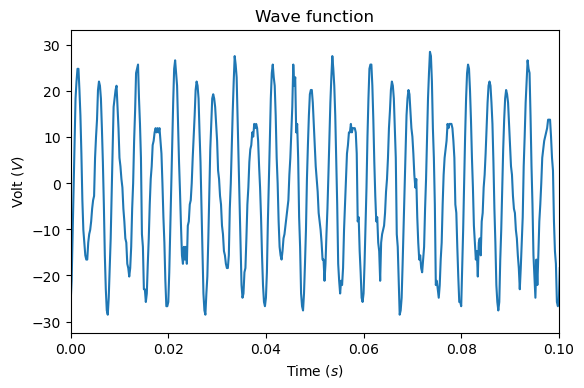

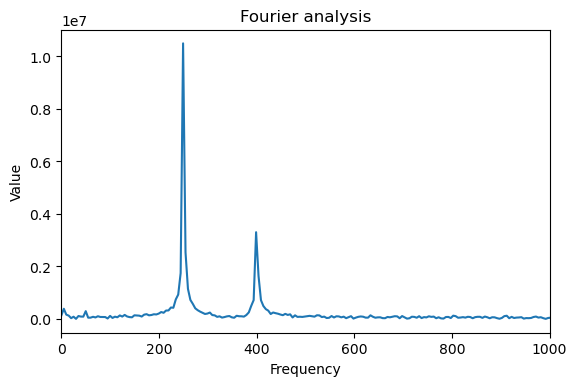

[  4.98504487  49.85044865 249.25224327 398.80358923]
Data_file:  2


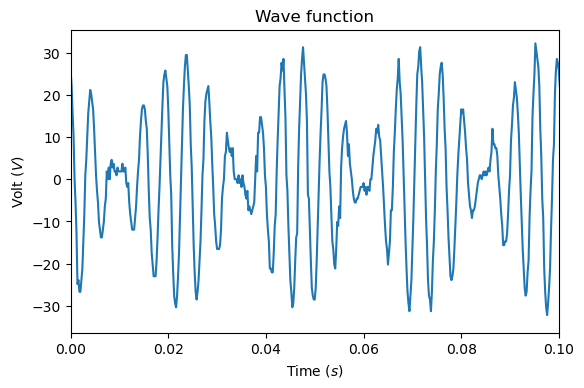

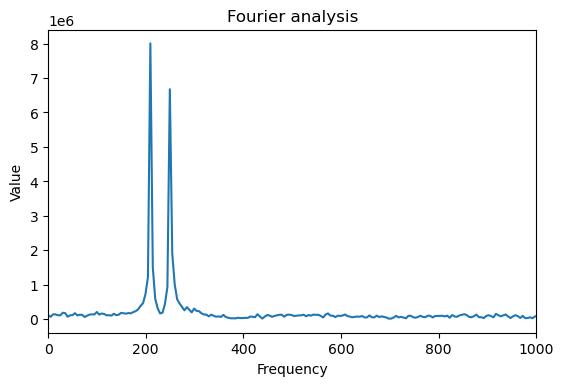

[209.37188435 249.25224327]
Data_file:  3


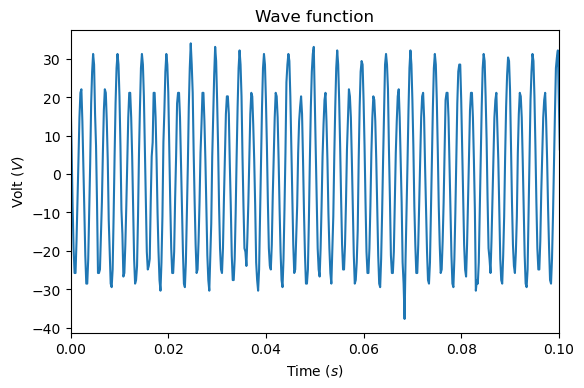

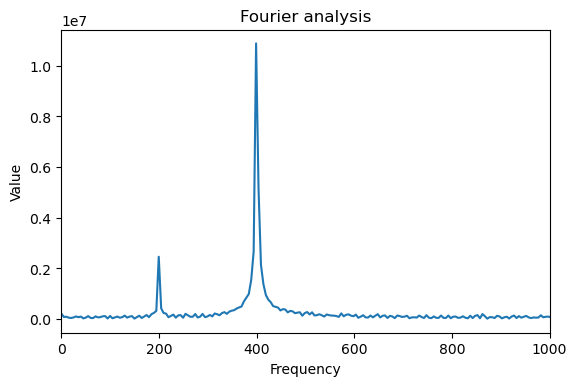

[199.40179462 398.80358923]
Data_file:  4


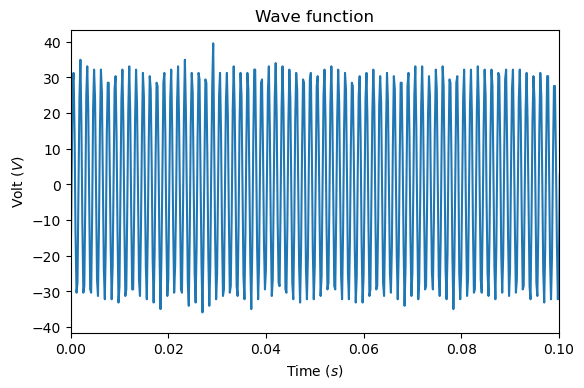

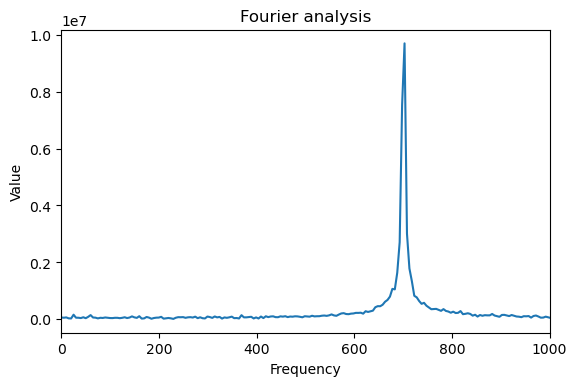

[702.89132602]
Data_file:  5


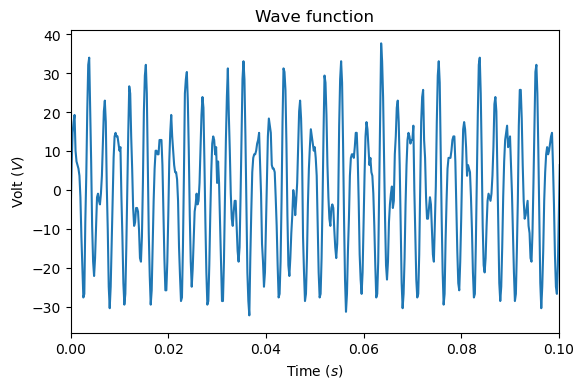

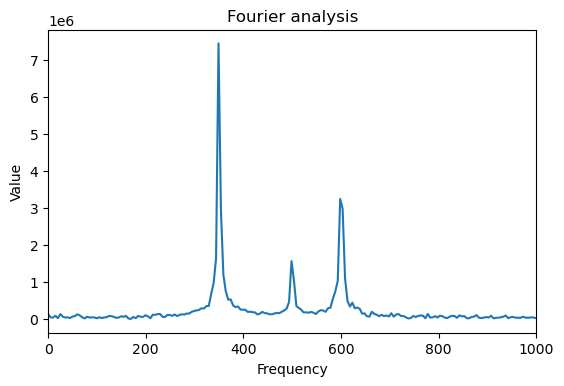

[348.95314058 498.50448654 598.20538385]
Data_file:  6


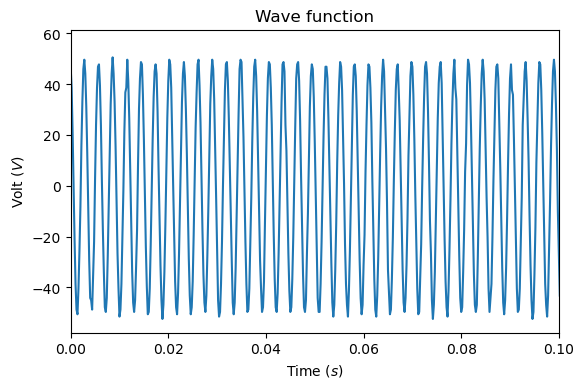

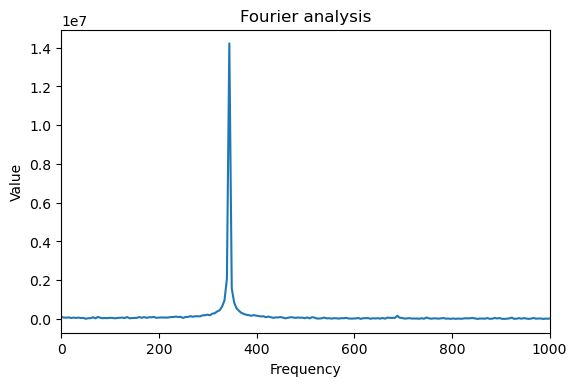

[343.96809571]
Data_file:  7


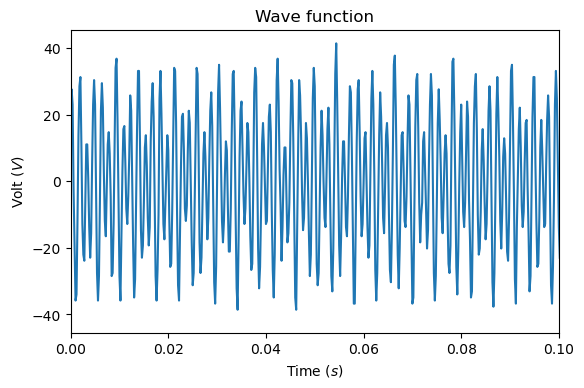

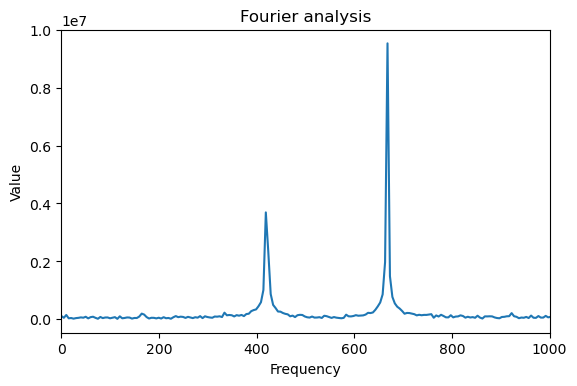

[418.74376869 667.99601196]
Data_file:  8


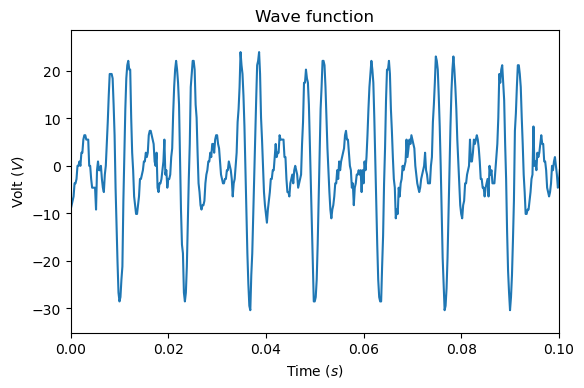

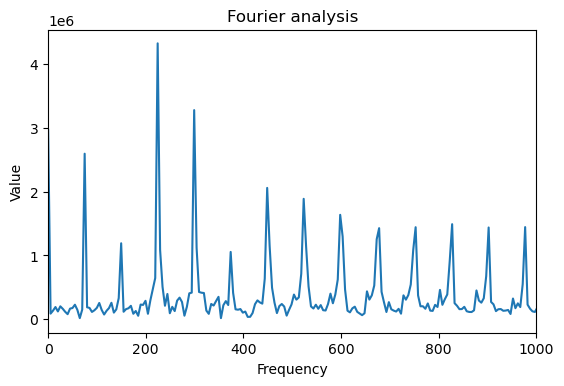

[  74.77567298  149.55134596  224.32701894  299.10269192  373.87836491
  448.65403789  523.42971087  598.20538385  752.74177468  802.59222333
  827.51744766  902.29312064  977.06879362 1051.8444666  1126.62013958
 1201.39581256 1276.17148554 1350.94715852 1425.72283151 2003.98803589
 2153.53938185 2228.31505484 2253.24027916 2303.09072782 2328.01595214
 2377.8664008  2402.79162512 2452.64207378 2477.56729811]
Data_file:  9


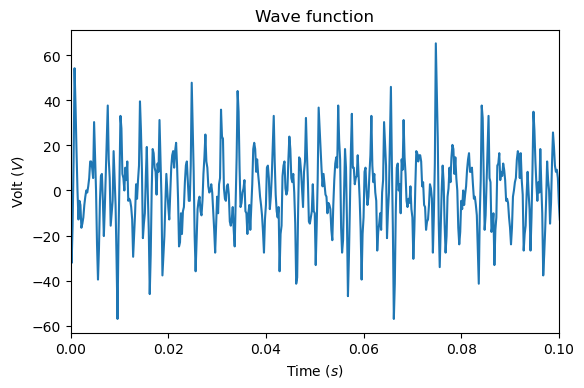

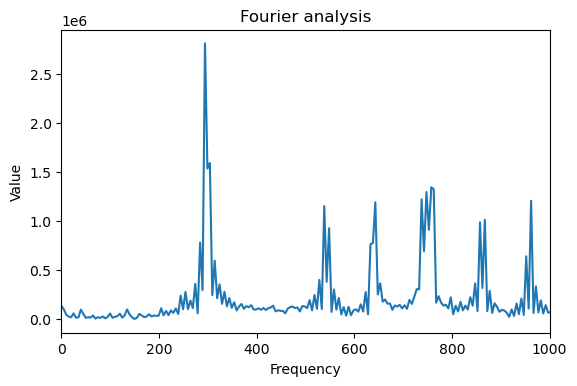

[ 274.1774676   284.14755733  294.11764706  314.05782652  528.41475573
  538.38484546  548.35493519  558.32502493  643.07078764  737.78664008
  747.75672981  847.45762712  857.42771685  867.39780658  877.36789631
  952.14356929  962.11365902  972.08374875 1206.38085743 2248.2552343
 2298.10568295 2462.61216351]
Data_file:  10


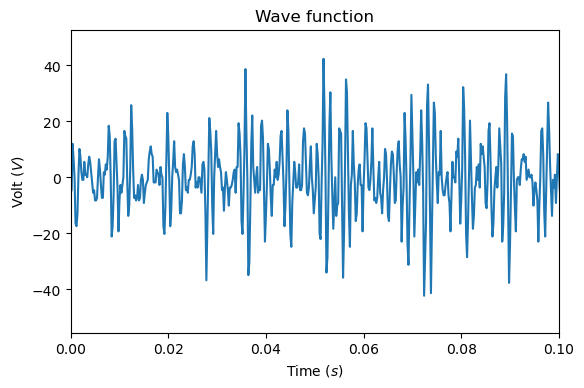

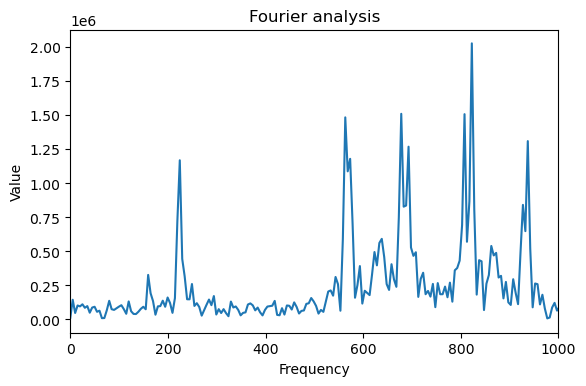

[ 224.32701894  563.31006979  677.96610169  692.92123629  807.5772682
  822.53240279  937.1884347  1340.97706879]


In [2]:
frequencies = []
cm = 1/2.54
for n in range(10):
    print('Data_file: ', n+1)
    data = np.genfromtxt(f'Filer til proof of fourier analyse/Lyd_{n+1}.txt', delimiter = '	', skip_header = 2)


    ts = data[:, 0]*10**-3
    Vs = data[:, 1]
    fig, ax = plt.subplots(figsize = (16*cm, 10*cm))

    ax.set_title('Wave function')
    ax.set_xlabel('Time ($s$)')
    ax.set_ylabel('Volt ($V$)')
    ax.plot(ts, Vs)
    ax.set_xlim(0, 0.1)
    if n + 1 == 5:
        plt.savefig('Wave function.png')
    plt.show()

    SAMPLE_RATE = len(ts)/round(ts.max(), 4)
    DURATION = round(ts.max(), 4)

    normalized_signal = np.int16(Vs/Vs.max()*(2**15 - 1))
    N = int(DURATION * SAMPLE_RATE) + 1
    ys = abs(rfft(normalized_signal))
    xs = rfftfreq(N, 1/SAMPLE_RATE)

    fig, ax = plt.subplots(figsize = (16*cm, 10*cm))
    ax.plot(xs, ys)
    ax.set_xlim(0, 1000)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Value')
    ax.set_title('Fourier analysis')
    if n + 1 == 5:
        plt.savefig('Fourier analysis of signal 5.png')
    plt.show()

    peaks = signal.find_peaks(ys, threshold = 10**5.3)[0]
    frequencies.append(xs[peaks])
    print(xs[peaks])

In [3]:
for i, f in enumerate(frequencies):
    print(f'Fil {i + 1}\'s frekvenser: ', f, 'Hz')

Fil 1's frekvenser:  [  4.98504487  49.85044865 249.25224327 398.80358923] Hz
Fil 2's frekvenser:  [209.37188435 249.25224327] Hz
Fil 3's frekvenser:  [199.40179462 398.80358923] Hz
Fil 4's frekvenser:  [702.89132602] Hz
Fil 5's frekvenser:  [348.95314058 498.50448654 598.20538385] Hz
Fil 6's frekvenser:  [343.96809571] Hz
Fil 7's frekvenser:  [418.74376869 667.99601196] Hz
Fil 8's frekvenser:  [  74.77567298  149.55134596  224.32701894  299.10269192  373.87836491
  448.65403789  523.42971087  598.20538385  752.74177468  802.59222333
  827.51744766  902.29312064  977.06879362 1051.8444666  1126.62013958
 1201.39581256 1276.17148554 1350.94715852 1425.72283151 2003.98803589
 2153.53938185 2228.31505484 2253.24027916 2303.09072782 2328.01595214
 2377.8664008  2402.79162512 2452.64207378 2477.56729811] Hz
Fil 9's frekvenser:  [ 274.1774676   284.14755733  294.11764706  314.05782652  528.41475573
  538.38484546  548.35493519  558.32502493  643.07078764  737.78664008
  747.75672981  847.457